In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
!pip install dtale
!pip install sweetviz

     |████████████████████████████████| 10.9 MB 603 kB/s eta 0:00:01   |                                | 30 kB 1.7 MB/s eta 0:00:07
     |████████████████████████████████| 7.3 MB 63.2 MB/s eta 0:00:01
     |████████████████████████████████| 62 kB 655 kB/s  eta 0:00:01
     |████████████████████████████████| 642 kB 63.7 MB/s eta 0:00:01
     |████████████████████████████████| 47 kB 2.7 MB/s  eta 0:00:01
     |████████████████████████████████| 79.9 MB 44.4 MB/s eta 0:00:01     |████████████████▋               | 41.6 MB 43.0 MB/s eta 0:00:01
     |████████████████████████████████| 1.8 MB 67.8 MB/s eta 0:00:01
     |████████████████████████████████| 197 kB 72.2 MB/s eta 0:00:01
     |████████████████████████████████| 45 kB 2.4 MB/s  eta 0:00:01
     |████████████████████████████████| 243 kB 54.8 MB/s eta 0:00:01
     |████████████████████████████████| 96 kB 3.9 MB/s  eta 0:00:01
     |████████████████████████████████| 357 kB 61.4 MB/s eta 0:00:01
  Created wheel for dash-core-components: 

In [22]:
import pandas as pd
df = pd.read_csv(r'../input/dtale-1/wave_comparison.csv')

In [21]:
import pandas as pd

import dtale
import dtale.app as dtale_app

dtale_app.USE_NGROK = True

d=dtale.show(df)

d.main_url()

http://ca37-34-91-213-183.ngrok.io/dtale/main/2


In [5]:
import plotly.express as px

df2 = df[['covid_status', 'mfcc4', 'mfcc5', 'mfcc6', 'mfcc7', 'mfcc8', 'mfcc9', 'mfcc10',
       'mfcc11', 'mfcc12', 'mfcc13', 'mfcc14', 'mfcc15', 'mfcc16', 'mfcc17',
       'mfcc18', 'mfcc19', 'mfcc20']]
first_wave = df2[df2['covid_status'] == 'first'].mean()
second_wave = df2[df2['covid_status'] == 'second'].mean()
mean_values = pd.concat([first_wave, second_wave], axis=1).reset_index()
mean_values.columns = ['metric', 'first_wave', 'second_wave']
df1=pd.melt(mean_values,id_vars=['metric'],var_name='wave', value_name='value')
fig = px.bar(df1, x="metric", color="wave",
             y='value', text='value',
             title="Comparison of Mean values of MFCCs",
             barmode='group',
             height=600
            )
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')

fig.show()

These significant differences signify that the particular variable is more important which can also be proved by Feature importance techniques

## Info from DTale:
##### Disclamer: After Removing Outliers, all *differences* are **Mean values**

- Significant difference in MFCC 16-20
- Significant difference in MFCC 13
- **Sign Change in (mean of) MFCC 7**
- Small difference in MFCC 5
- No Difference in rest MFCCs

- Similar Values of RMSE, chroma_stft
- (Almost) Same values of spectral centroids

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


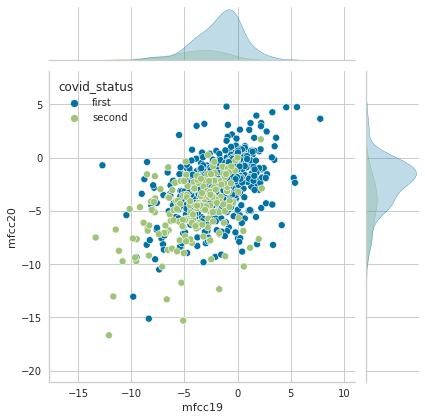

In [41]:
#Linear regression with marginal distributions
g = sns.jointplot("mfcc19", "mfcc20", data=df, hue="covid_status")
#g.plot_joint(sns.kdeplot, color="r", zorder=0, levels=6)
#g.plot_marginals(sns.rugplot, color="r", height=-.15, clip_on=False)

In [43]:
fig = px.histogram(df, x="mfcc19", color="covid_status",
                   marginal="box",title="MFCC 19 comparison",
                   hover_data=df.columns)
fig.show()

In [33]:
fig = px.histogram(df, x="mfcc7", color="covid_status",
                   marginal="box",title="MFCC 7 comparison", # or violin, rug
                   hover_data=df.columns)
fig.show()

In [34]:
fig = px.histogram(df, x="mfcc20", color="covid_status",
                   marginal="box",title="MFCC 20 comparison", # or violin, rug
                   hover_data=df.columns)
fig.show()

In [6]:
df.columns

Index(['covid_status', 'chroma_stft', 'rmse', 'spectral_centroid',
       'spectral_bandwidth', 'rolloff', 'zero_crossing_rate', 'mfcc1', 'mfcc2',
       'mfcc3', 'mfcc4', 'mfcc5', 'mfcc6', 'mfcc7', 'mfcc8', 'mfcc9', 'mfcc10',
       'mfcc11', 'mfcc12', 'mfcc13', 'mfcc14', 'mfcc15', 'mfcc16', 'mfcc17',
       'mfcc18', 'mfcc19', 'mfcc20'],
      dtype='object')

In [7]:
df2 = df[['covid_status', 'chroma_stft', 'rmse', 'spectral_centroid', 'spectral_bandwidth', 'rolloff', 'zero_crossing_rate']]
first_wave = df2[df2['covid_status'] == 'first'].mean()
second_wave = df2[df2['covid_status'] == 'second'].mean()
mean_values = pd.concat([first_wave, second_wave], axis=1).reset_index()
mean_values.columns = ['metric', 'first_wave', 'second_wave']
df1=pd.melt(mean_values,id_vars=['metric'],var_name='wave', value_name='value')
fig = px.bar(df1, x="metric", color="wave",
             y='value', text='value',
             title="Comparison of Mean values of other features",
             barmode='group',
             height=600
            )
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')

fig.show()

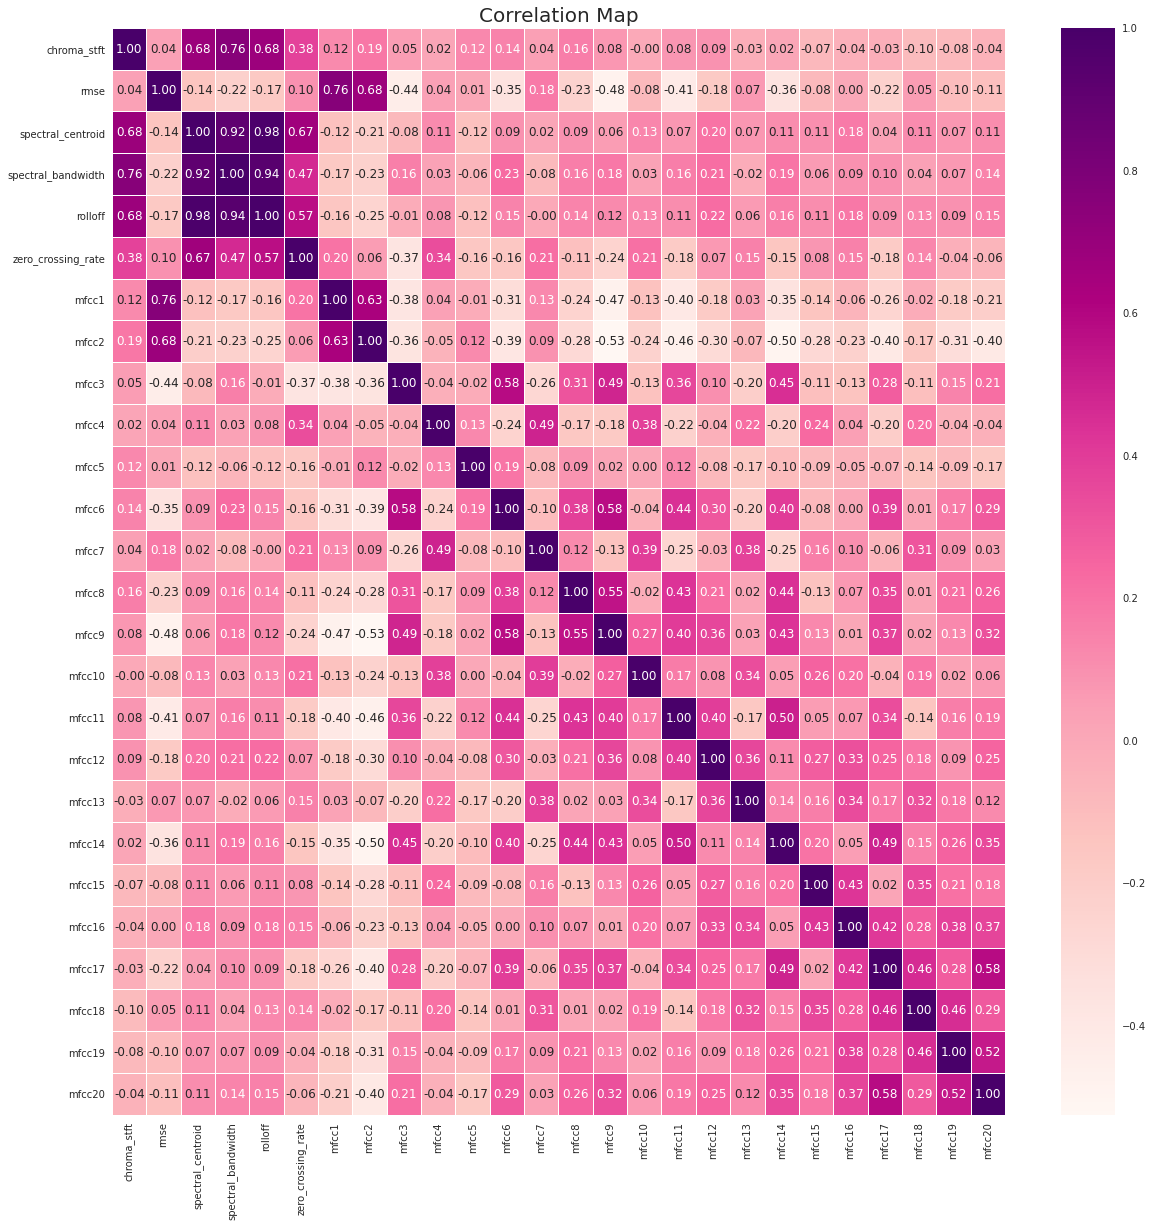

In [25]:
#correlation map
import seaborn as sns
import missingno as msno

f, ax = plt.subplots(figsize=(20,20))
sns.heatmap(df.corr(), annot=True, linewidth=".5", cmap="RdPu", fmt=".2f", ax = ax)
plt.title("Correlation Map",fontsize=20)
plt.show()

## Autoviz

In [8]:
#pip install autoviz

In [9]:
# # Dont RUN
# # Extract to HTML File
# from autoviz.AutoViz_Class import AutoViz_Class
# AV = AutoViz_Class()
# df_autoviz = AV.AutoViz(r'../input/dtale-1/wave_comparison.csv', depVar='covid_status')

## Feature Importance Analysis

In [10]:
wave_comparison = pd.read_csv('../input/dtale-1/wave_comparison.csv')

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[06:53:19] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


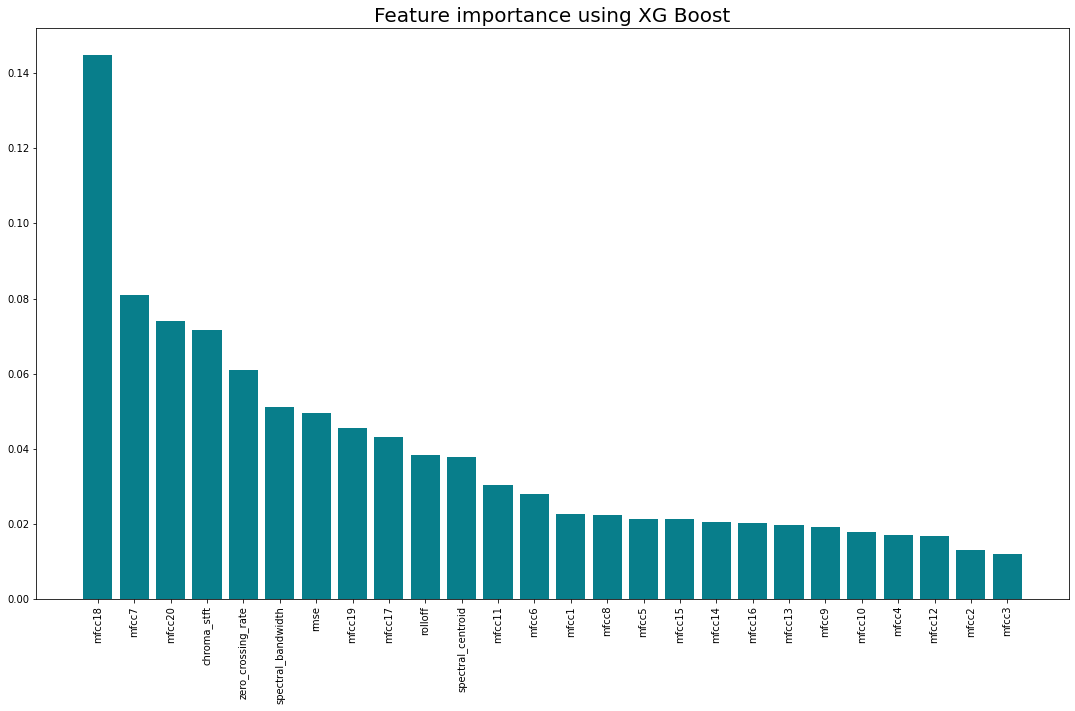

In [14]:
# Using Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import rcParams
from xgboost import XGBClassifier
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

le = preprocessing.LabelEncoder()
df['covid_status']= le.fit_transform(df['covid_status'])

df = wave_comparison
X = df.drop('covid_status', axis=1)
y = df['covid_status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test)

model = XGBClassifier()
model.fit(X_train_scaled, y_train)
importances = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance': model.feature_importances_
})
importances = importances.sort_values(by='Importance', ascending=False)

fig = plt.gcf()
plt.bar(x=importances['Attribute'], height=importances['Importance'], color='#087E8B')
plt.title('Feature importance using XG Boost', size=20)
plt.xticks(rotation='vertical')
#figure(figsize=(8, 6), dpi=80)
fig.set_size_inches(18.5, 10.5)
plt.show()

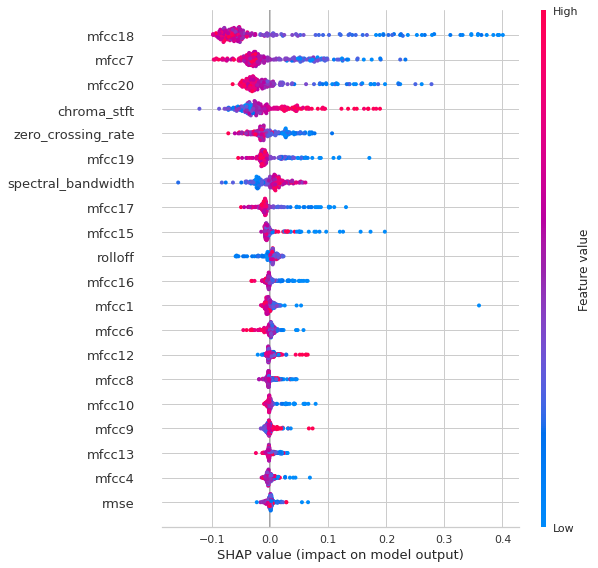

In [20]:
# import numpy as np
# import pandas as pd
# from sklearn.datasets import load_boston
# from sklearn.model_selection import train_test_split
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.inspection import permutation_importance
# import shap
# from matplotlib import pyplot as plt

# plt.rcParams.update({'figure.figsize': (12.0, 8.0)})
# plt.rcParams.update({'font.size': 16})

# rf = RandomForestRegressor(n_estimators=100)
# rf.fit(X_train, y_train)

# sorted_idx = rf.feature_importances_.argsort()
# plt.barh(X_train.columns[sorted_idx], rf.feature_importances_[sorted_idx])
# plt.xlabel("Random Forest Feature Importance")

explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X_test)

shap.summary_plot(shap_values, X_test)

2021-09-04 06:59:00,189 - WARNING  - findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
2021-09-04 06:59:00,190 - WARNING  - findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
2021-09-04 06:59:00,196 - WARNING  - findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
2021-09-04 06:59:00,197 - WARNING  - findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
2021-09-04 06:59:00,203 - WARNING  - findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
2021-09-04 06:59:00,204 - WARNING  - findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif


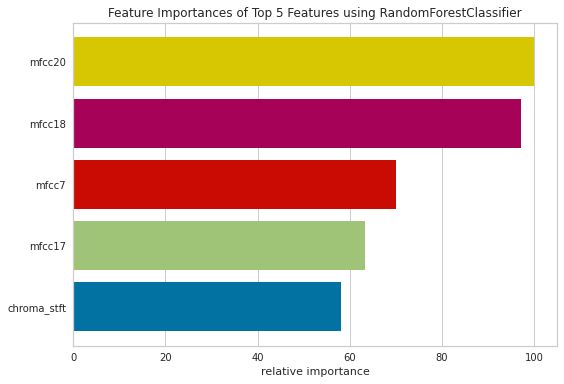

<AxesSubplot:title={'center':'Feature Importances of Top 5 Features using RandomForestClassifier'}, xlabel='relative importance'>

In [17]:
# https://www.scikit-yb.org/en/latest/api/model_selection/importances.html
from sklearn.ensemble import RandomForestClassifier

from yellowbrick.datasets import load_occupancy
from yellowbrick.model_selection import FeatureImportances

model = RandomForestClassifier(n_estimators=10)
viz = FeatureImportances(model, relative=True, topn = 5)
viz.fit(X, y)
viz.show()

[06:59:17] WARNING: ../src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.
[06:59:17] WARNING: ../src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

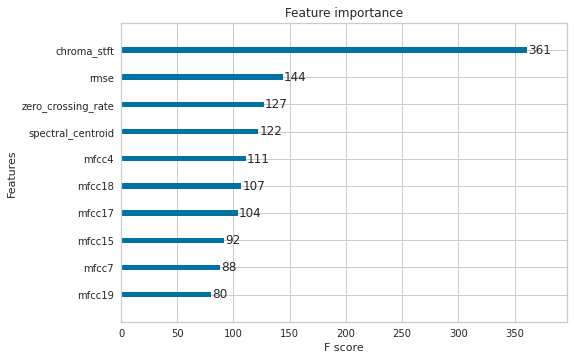

In [18]:
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

import pandas as pd
import scipy as sp
import xgboost as xgb

import matplotlib.pyplot as plt
xgbr = xgb.XGBRegressor(max_depth=10, 
                        learning_rate=0.1, 
                        n_estimators=60, 
                        silent=True, 
                        min_child_weight=1,
                        objective='reg:linear')
xgbr.fit(X_train, y_train, eval_metric='rmse', verbose = False, eval_set = [(X_train,y_train),(X_test, y_test)],early_stopping_rounds=10)


_xgbr = xgb.XGBRegressor(seed=668)
###############################################
## param as max_num_features is can't be used!
###############################################

xgb.plot_importance(xgbr,max_num_features=10)

In [44]:
fig = px.histogram(df, x="chroma_stft", color="covid_status",
                   marginal="box",title="Chroma STFT comparison", # or violin, rug
                   hover_data=df.columns)
fig.show()

In [ ]:
# https://plotly.com/python/bar-charts/#bar-chart-with-direct-labels
# https://towardsdatascience.com/how-to-create-a-grouped-bar-chart-with-plotly-express-in-python-e2b64ed4abd7
# filename = 'https://raw.githubusercontent.com/HimanshuKGP007/COVID_app/master/wave_comparison.csv'
# https://analyticsindiamag.com/tips-for-automating-eda-using-pandas-profiling-sweetviz-and-autoviz-in-python/